<a href="https://colab.research.google.com/github/woodRock/grokking-deep-learning/blob/main/chapter_5_introduction_to_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5 - Introduction to back propagation 

Imagine a streetlight in a foriegn country with three lights. You are trying to work out when it is safe to walk. The state of each of the three lights on the streetlight can be represented as a vector. Whether or not pedestrians walk, can be encoded in binary, where 0 is stop, and 1 is walk.

## Learning a single instance 

Below we train a simple neural network to learn a single instance for the streetlight dataset, (online) gradient descent.

In [2]:
import numpy as np
weights = np.array([0.5,0.48,-0.7])
alpha = 0.1

streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1],
                         [0,1,1],
                         [1,0,1]])
walk_vs_stop = np.array([[0],
                         [1],
                         [0],
                         [1],
                         [1],
                         [0]])

input = streetlights[0]
goal_prediction = walk_vs_stop[0]

for iteration in range(20):
    prediction = input.dot(weights) # weighted sum between input and weights. 
    error = (goal_prediction - prediction) ** 2
    delta = prediction - goal_prediction 
    weights = weights - (alpha * (input * delta))

    print(f"Error: {error} Prediction: {prediction}")a

Error: [0.04] Prediction: -0.19999999999999996
Error: [0.0256] Prediction: -0.15999999999999992
Error: [0.016384] Prediction: -0.1279999999999999
Error: [0.01048576] Prediction: -0.10239999999999982
Error: [0.00671089] Prediction: -0.08191999999999977
Error: [0.00429497] Prediction: -0.06553599999999982
Error: [0.00274878] Prediction: -0.05242879999999994
Error: [0.00175922] Prediction: -0.04194304000000004
Error: [0.0011259] Prediction: -0.03355443200000008
Error: [0.00072058] Prediction: -0.02684354560000002
Error: [0.00046117] Prediction: -0.021474836479999926
Error: [0.00029515] Prediction: -0.01717986918399994
Error: [0.00018889] Prediction: -0.013743895347199997
Error: [0.00012089] Prediction: -0.010995116277759953
Error: [7.73712525e-05] Prediction: -0.008796093022207963
Error: [4.95176016e-05] Prediction: -0.007036874417766459
Error: [3.1691265e-05] Prediction: -0.0056294995342132115
Error: [2.02824096e-05] Prediction: -0.004503599627370569
Error: [1.29807421e-05] Prediction: -

## Learning the whole dataset

Training the network on all instances at once, (full) gradient descent.

In [4]:
import numpy as np

weights = np.array([0.5, 0.48,-0.7])
alpha = 0.1 

streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1],
                         [0,1,1],
                         [1,0,1]])
walk_vs_stop = np.array([[0],
                         [1],
                         [0],
                         [1],
                         [1],
                         [0]])

input = streetlights[0]
goal_prediction = walk_vs_stop[0]

for iteration in range(40):
    error_for_all_lights = 0 
    for row_index in range(len(walk_vs_stop)):
        input = streetlights[row_index]
        goal_prediction = walk_vs_stop[row_index]
        
        prediction = input.dot(weights)

        error = (goal_prediction - prediction) ** 2
        error_for_all_lights += error 

        delta = prediction - goal_prediction 
        weights = weights - (alpha * (input * delta))
        print(f"Prediction: {prediction}")
    print(f"Error: {error_for_all_lights}")

Prediction: -0.19999999999999996
Prediction: -0.19999999999999996
Prediction: -0.5599999999999999
Prediction: 0.6160000000000001
Prediction: 0.17279999999999995
Prediction: 0.17552
Error: [2.65612311]
Prediction: 0.14041599999999999
Prediction: 0.3066464
Prediction: -0.34513824
Prediction: 1.006637344
Prediction: 0.4785034751999999
Prediction: 0.26700416768
Error: [0.96287018]
Prediction: 0.213603334144
Prediction: 0.5347420299776
Prediction: -0.26067345110016
Prediction: 1.1319428845096962
Prediction: 0.6274723921901568
Prediction: 0.25433999330650114
Error: [0.55091659]
Prediction: 0.20347199464520088
Prediction: 0.6561967149569552
Prediction: -0.221948503950995
Prediction: 1.166258650532124
Prediction: 0.7139004922542389
Prediction: 0.21471099528371604
Error: [0.36445837]
Prediction: 0.17176879622697283
Prediction: 0.7324724146523222
Prediction: -0.19966478845083285
Prediction: 1.1697769945341199
Prediction: 0.7719890116601171
Prediction: 0.17297997428859369
Error: [0.25167687]
Pred

## Full, batch, stochastic gradient descent

**Full gradient descent** - updates weights one dataset at a time. 

Updates the weights once, by calculating the average weight delta for the entire dataset, and changing the weights only once, by that average.

**Batch gradient descent** - updates weights after n examples.

You choose a batch size, typically a $2^n$ between 8 and 256, the number of examples to calculate a weight delta for, before updating the weights.

## Overfitting

If a particular configuration of weights _accidentally_ create the perfect correlation between the prediction and output dataset, without giving the heaviest weight to the est inputs, the neural network will stop learning.

## Back propagation - long-distance error attribution

The process of moving the delta signal around, the contribution of weights from the previous layer to the next, is called backpropagation. The weights between layers describe exactly how much each previous layer node contributes to the next layers prediction.

Multiply the delta at the current layer by the respective weights of the previous layer, to calculate the delta at the previous layer. The reverse of the logic behind a forward pass of the neural network.

## Non-linearity

Takeaway: for any two multiplciations, we can get the same result with a single multiplication.

For any three layer network (without non-linearities) there is a two-layer network with identical behaviour. Where two consecutive weighted sums, is more expensive than one.

The input and ouput datasets are not correleated, so we add hidden layers, to create a correlation between the input and the hidden layers, then, the hidden layers and the output. We need hidden layers to selectively correlate the input, i.e. conditional or sometimes correlation. 

Conditional input, means a node in the hidden layer, can choose whether it wants to be correlated to an input node. E.g. "make me perfectly correleated to the left input, but only when the right input is turned off". 

Only a three-layer neural network with non-linearities is capabale of conditional correlation. The fancy term for "if the node would be negative, set it to" is a nonlinearity.

Fancy textbooks say, "consecutive matrix multiplication is a linear transformation", which in plain english could be restated that "without the nonlinearity, two multiplications might as well be 1."

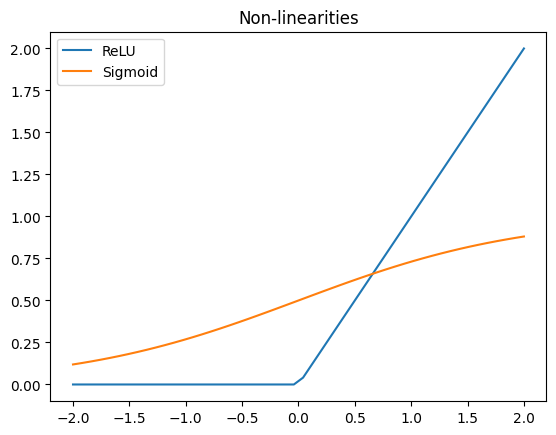

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(1)

relu = lambda x: (x > 0) * x
sigmoid = lambda x: 1 / (1 + np.exp(-x))

x = np.linspace(-2,2)
y = relu(x)
plt.plot(x,y, label="ReLU")
y = sigmoid(x)
plt.plot(x,y, label="Sigmoid")
plt.title("Non-linearities")
plt.legend()

## Muh first deep neural network - Forward pass

In [25]:
import numpy as np
np.random.seed(1)

# Training data
streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1],
                        ])
walk_vs_stop = np.array([[1,1,0,0]]).T

# Hyperparamters
alpha = 0.2 
hidden_size = 4
input, output = (streetlights.shape[1],walk_vs_stop.shape[1])

# Non-linearity
relu = lambda x: (x > 0) * x

weights_0_1 = 2*np.random.random((input,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,output)) - 1

layer_0 = streetlights[0]
layer_1 = relu(np.dot(layer_0, weights_0_1))
layer_2 = np.dot(layer_1, weights_1_2)
print(f"Layer 2 prediction: {layer_2}")

Layer 2 prediction: [0.39194327]


## Backpropagation in code

The slope of the activation function (or non-linearity) the relu, is given by the `relu2dervi` function.

\* This line computes the detla at layer_1 given the detla at layer_2 by taking the layer_2_delta and multipling it by its weights connecting weights_1_2.

Error: 0.6342311598444467
Error: 0.35838407676317513
Error: 0.0830183113303298
Error: 0.006467054957103705
Error: 0.0003292669000750734
Error: 1.5055622665134859e-05


Text(0.5, 1.0, 'Loss Curve')

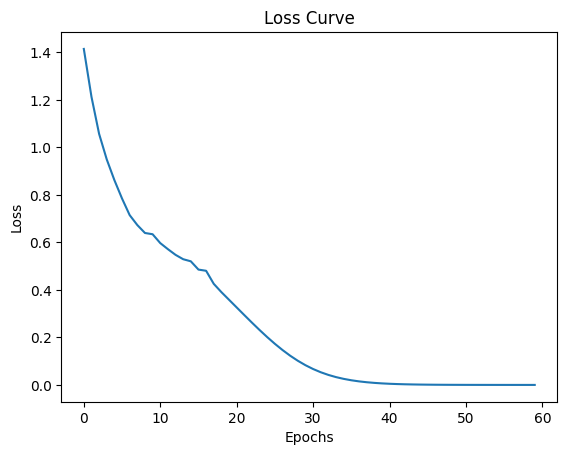

In [35]:
import numpy as np
np.random.seed(1)

# Training data
streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1],
                        ])
walk_vs_stop = np.array([[1,1,0,0]]).T

# Hyperparamters
alpha = 0.2 
hidden_size = 4
input, output = (streetlights.shape[1],walk_vs_stop.shape[1])
epochs = 60

# Non-linearity
relu = lambda x: (x > 0) * x

# The slope (i.e. deritivie) for the relu function.
relu2deriv = lambda x: x > 0 

weights_0_1 = 2*np.random.random((input,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,output)) - 1

errors = []

for iteration in range(epochs):
    layer_2_error = 0
    for i in range(len(streetlights)):
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)

        layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)
        layer_2_delta = (walk_vs_stop[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1) # *

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    errors.append(layer_2_error)
    
    if (iteration % 10 == 9):
        print(f"Error: {layer_2_error}")

plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")